# Volume notebook

This notebook is to explore the amounts of loan, deposits and successul vends.

Import libraries

In [59]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

Read the csv files into dataframes. CSV files include deposits,loans taken and all successful purchases of token between January and March 2019.
The features include:
* ***address***: the mobile number of account
* ***amount/transamount***: the total paid or borrowed for loan purchase
* ***unit***: the unit of the token
* ***transactionid*** : unique identifier for each transaction
* ***time/systranstime***: the timestamp of the transaction
* ***billrefnumber***:unique identifier for account

***successfulVends_raw***: holds data for successful purchases

***deposit_raw***: holds data for deposits

***loan_raw***: holds data for borrowed amounts to purchase tokens


They have been named raw because they contain unrequired features for building the model

In [60]:
successfulVends_raw = pd.read_csv("successfulVENDS2019.csv")
deposit_raw = pd.read_csv("deposit2019.csv")
loan_raw = pd.read_csv("loan2019.csv")

Selecting required features

In [61]:

deposit = deposit_raw[["systemtranstime","transamount"]]
successfulVends = successfulVends_raw[["time","amount","unit"]]
loan = loan_raw[["time","amount","unit"]]

In [62]:
#z = successfulVends[['amount','unit']]
def normalize(z):
    x = z
    x = x.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(np.vstack(x))
    return x_scaled


## Exploring the amount and units for deposits, successfulVends and loan

Renaming the deposit features to amount and time

In [63]:
deposit= deposit.rename(index=str,columns={"transamount":"amount","systemtranstime":"time"})

Converting time column to datetime type for easier manipulation

In [64]:
deposit['time']=pd.to_datetime(deposit.time)
successfulVends['time']=pd.to_datetime(successfulVends.time)
loan['time']=pd.to_datetime(loan.time)

In [65]:
def month(df1,df2,df3):

    for i in range(1,4):
        fig,axes = plt.subplots(nrows=1,ncols=3)
        df1[df1.index.month==i].plot(ax=axes[0],title="Deposit Amounts")
        df2[df2.index.month==i].plot(ax=axes[1],title="Successul Vends Amounts")
        df3[df3.index.month==i].plot(ax=axes[2],title="Loan Amounts")
        

Raw values no resampling

In [66]:
successfulVends.head()

,time,amount,unit
0,2019-01-01 06:59:57,1,0.07
1,2019-01-02 07:40:31,300,13.85
2,2019-01-02 07:41:16,100,5.28
3,2019-01-02 07:41:12,900,59.37
4,2019-01-02 10:41:37,700,46.18


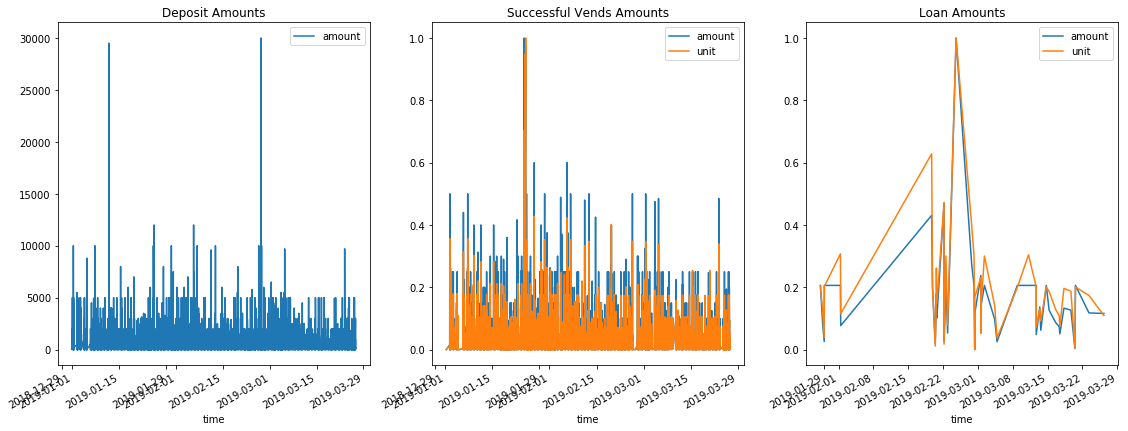

In [67]:
plt.rcParams['figure.figsize']=[19,7]
fig,axes = plt.subplots(nrows=1,ncols=3)
deposit.set_index('time').plot(ax=axes[0],title="Deposit Amounts")

successfulVends[['amount','unit']]=normalize(successfulVends[['amount','unit']])
loan[['amount','unit']]=normalize(loan[['amount','unit']])

successfulVends.set_index('time').plot(ax=axes[1],title="Successful Vends Amounts")
loan.set_index('time').plot(ax=axes[2],title="Loan Amounts")

Resampled by minute 

<Figure size 1224x936 with 0 Axes>

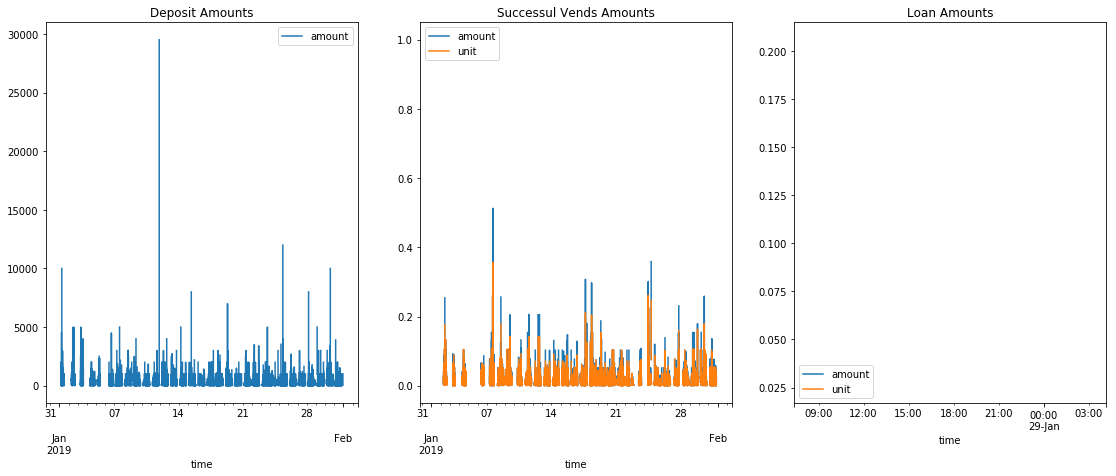

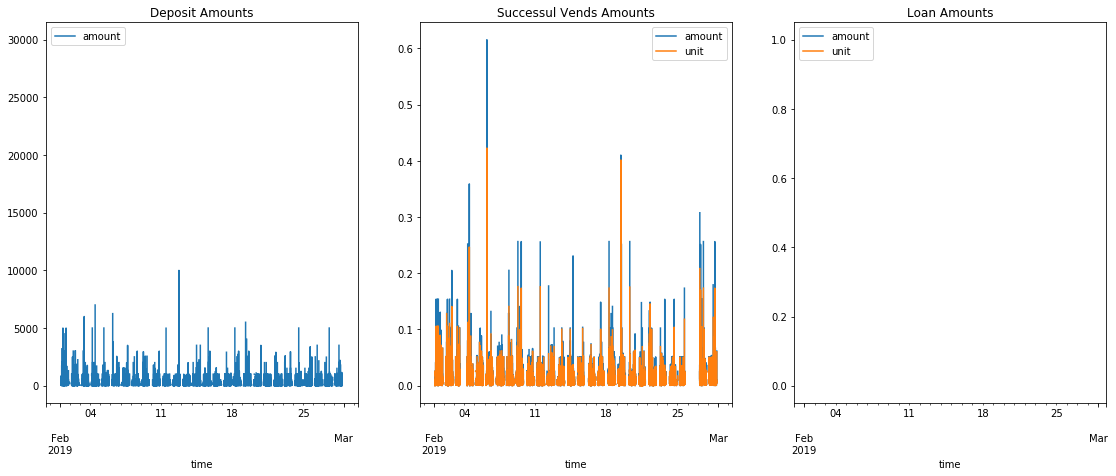

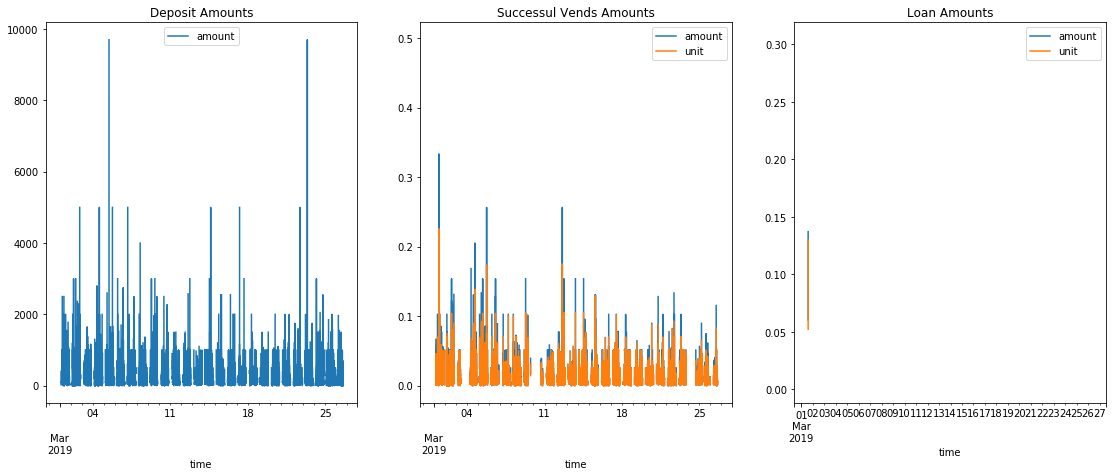

In [68]:
plt.figure(figsize=(17, 13))
deposit_min = deposit.resample('1min', on='time').mean()
successfulVends[['amount','unit']]=normalize(successfulVends[['amount','unit']])
successfulVends_min = successfulVends.resample('1min', on='time').mean()

successfulVends_min[['amount','unit']]=normalize(successfulVends_min[['amount','unit']])

loan_min = loan.resample('1min', on='time').mean()
loan_min[['amount','unit']]=normalize(loan_min[['amount','unit']])

month(deposit_min,successfulVends_min,loan_min)


Resampled by hour

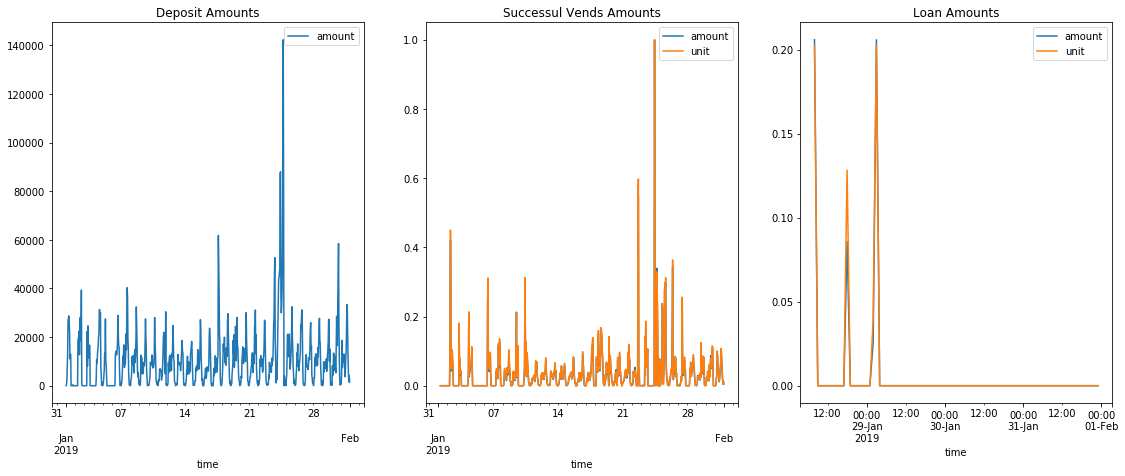

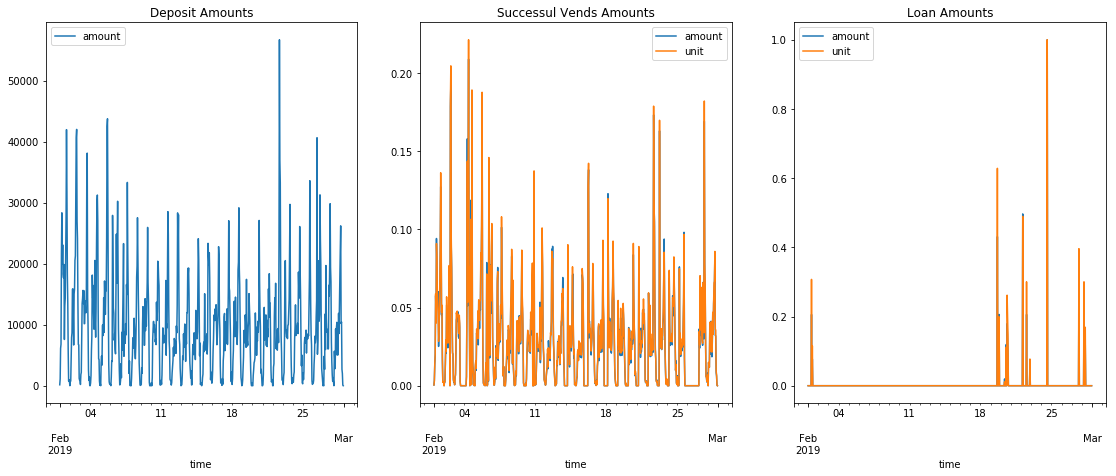

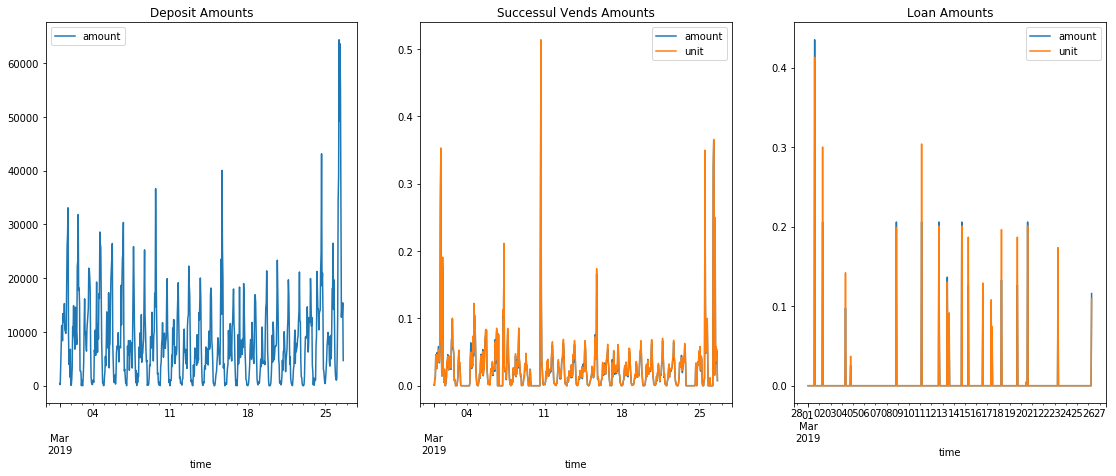

In [69]:
deposit_hour = deposit.resample('60min', on='time').sum()

successfulVends_hour = successfulVends.resample('60min', on='time').sum()
successfulVends_hour[['amount','unit']]=normalize(successfulVends_hour[['amount','unit']])
loan_hour = loan.resample('60min', on='time').sum()
loan_hour[['amount','unit']]=normalize(loan_hour[['amount','unit']])

month(deposit_hour,successfulVends_hour,loan_hour)

Resampled by day

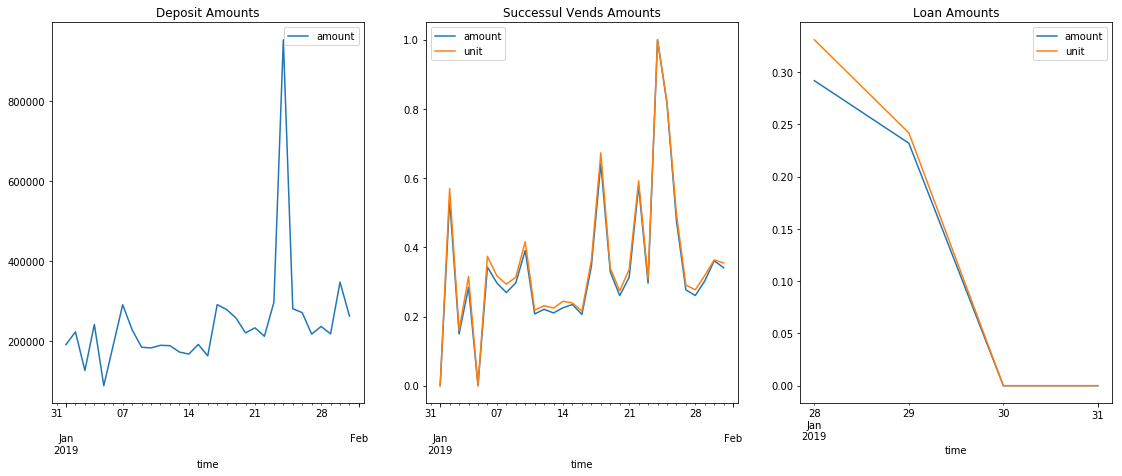

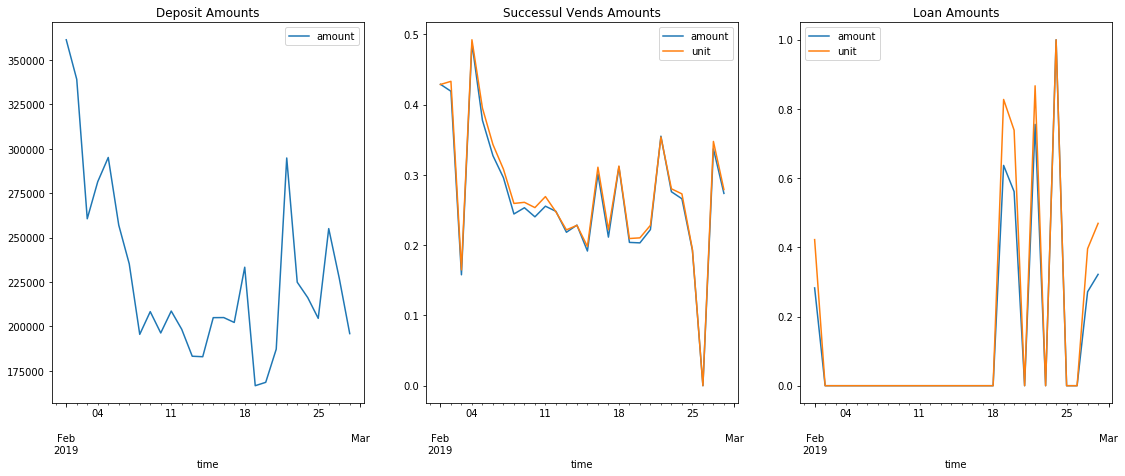

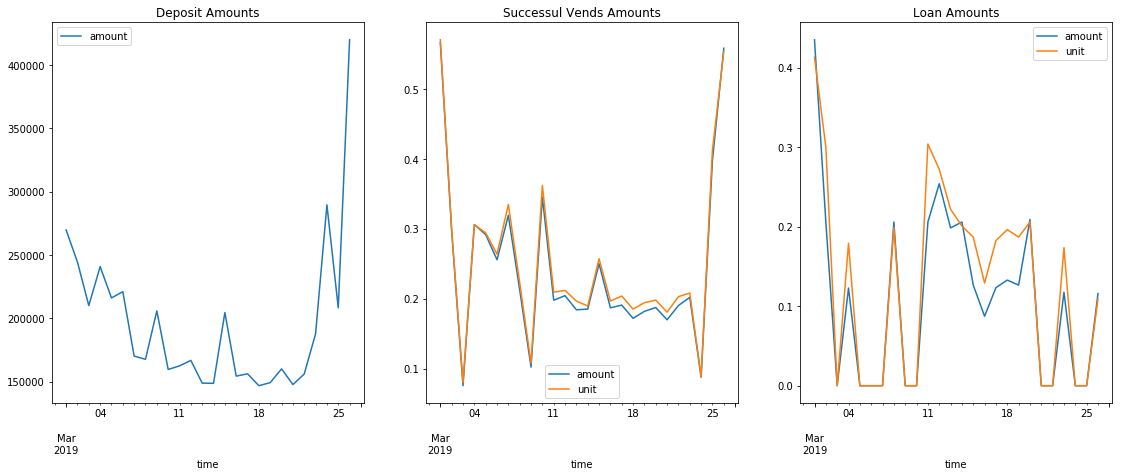

In [70]:
deposit_day = deposit.resample('1d', on='time').sum()
successfulVends_day = successfulVends.resample('1d', on='time').sum()
successfulVends_day[['amount','unit']]=normalize(successfulVends_day[['amount','unit']])
loan_day = loan.resample('1d', on='time').sum()
loan_day[['amount','unit']]=normalize(loan_day[['amount','unit']])

month(deposit_day,successfulVends_day,loan_day)

Resampled by 3H

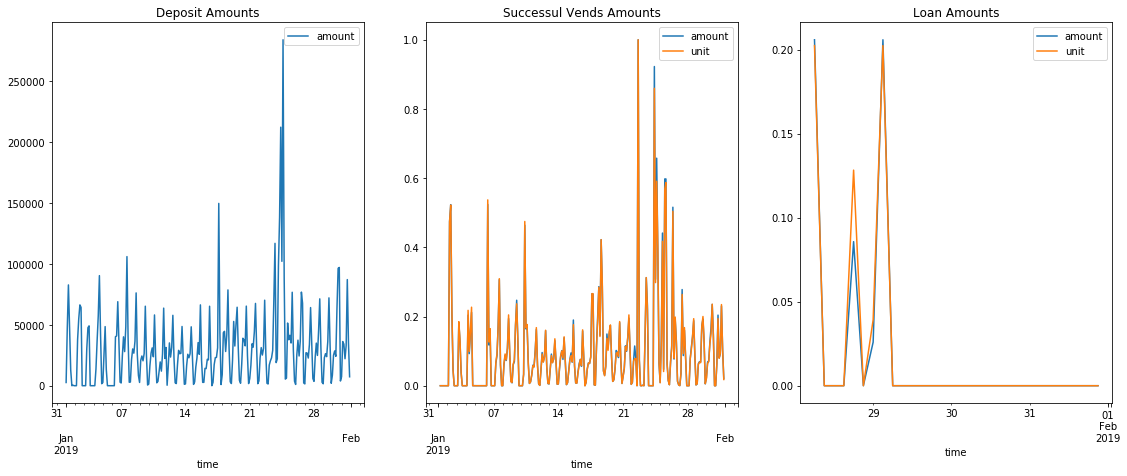

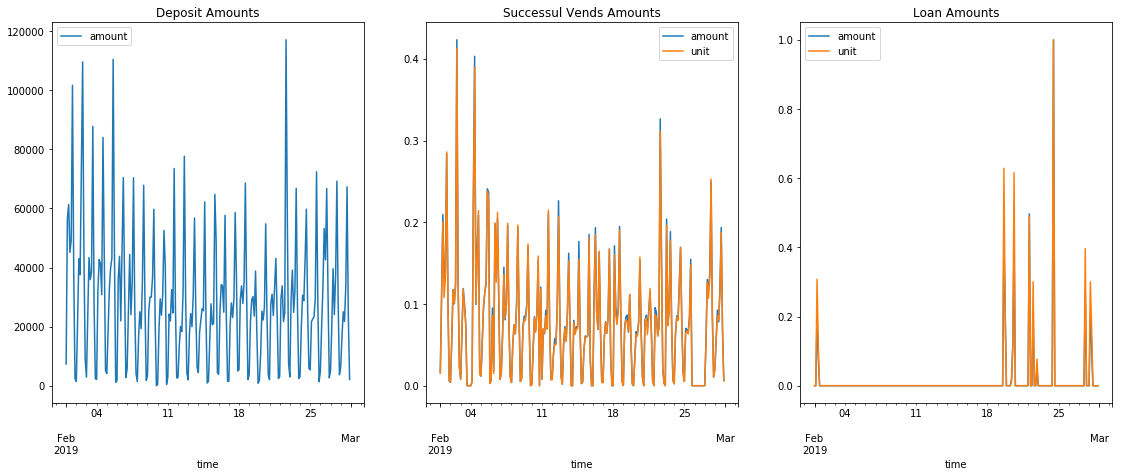

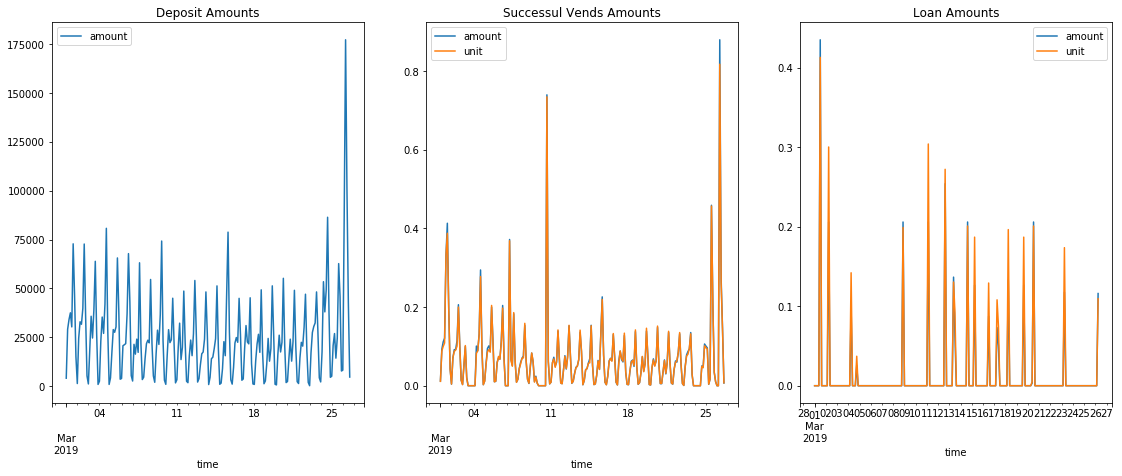

In [71]:
deposit_3H = deposit.resample('3H', on='time').sum()
successfulVends_3H = successfulVends.resample('3H', on='time').sum()
successfulVends_3H[['amount','unit']]=normalize(successfulVends_3H[['amount','unit']])
loan_3H = loan.resample('3H', on='time').sum()
loan_3H[['amount','unit']]=normalize(loan_3H[['amount','unit']])

month(deposit_3H,successfulVends_3H,loan_3H)

## Mean amount and units for each hour 

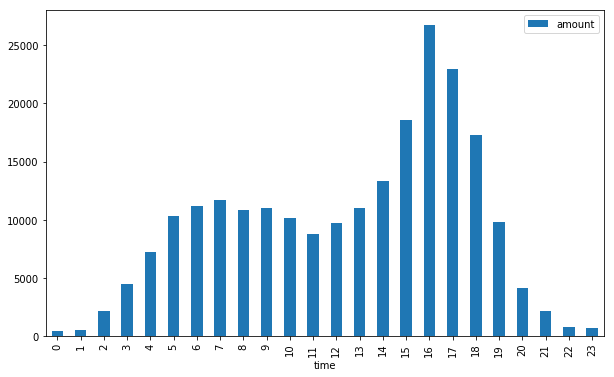

In [72]:
plt.rcParams['figure.figsize']=[10,6]
deposit_hour.groupby([deposit_hour.index.hour]).mean().plot.bar()

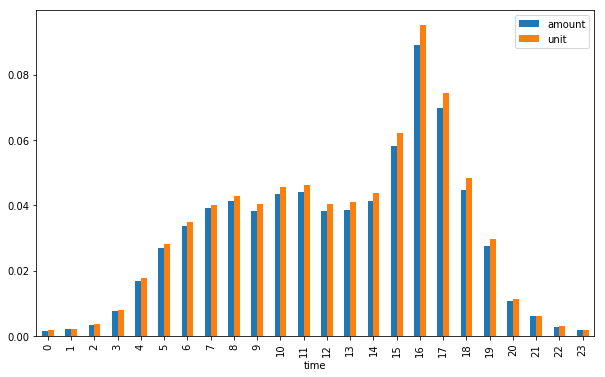

In [73]:
plt.rcParams['figure.figsize']=[10,6]
successfulVends_hour.groupby([successfulVends_hour.index.hour]).mean().plot.bar()

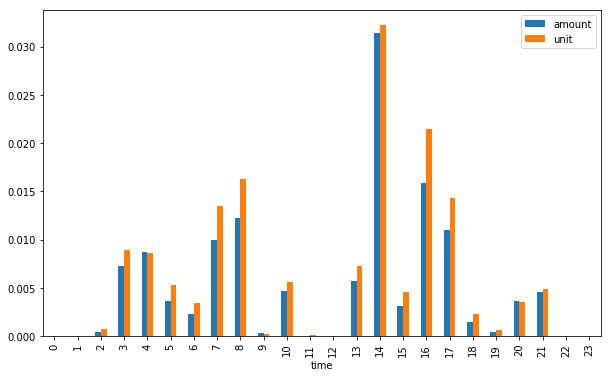

In [74]:
plt.rcParams['figure.figsize']=[10,6]
loan_hour.groupby([loan_hour.index.hour]).mean().plot.bar()

## Comparing Deposits, Loan and Successful Vends

### Comparing hourly

In [75]:
deposit_hour['amount']=normalize(deposit_hour['amount'])

In [76]:

df = pd.DataFrame([deposit_hour.amount,successfulVends_hour.amount,loan_hour.amount]).T.dropna()
df.columns=("deposit","successfulVends","loan")


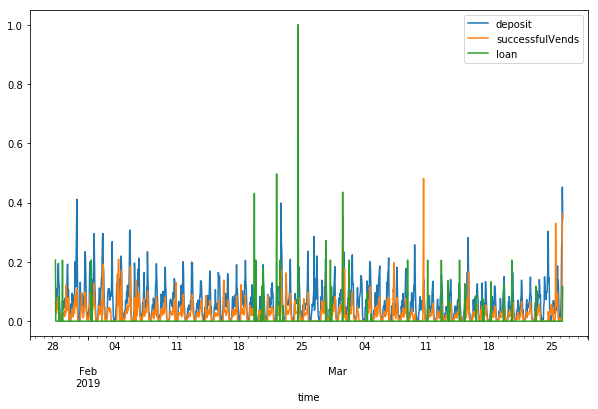

In [77]:
df.plot()


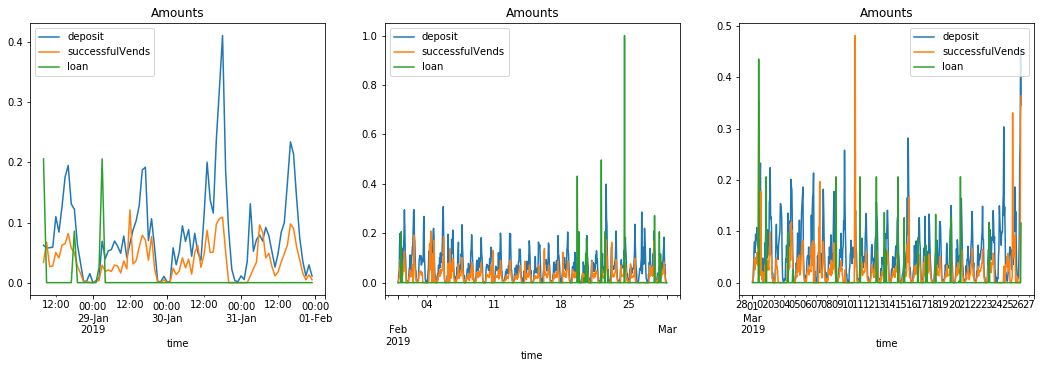

In [78]:
plt.rcParams['figure.figsize']=[18,5]
fig,axes = plt.subplots(nrows=1,ncols=3)
for i in range(1,4):
    
    df[df.index.month==i].plot(ax=axes[i-1],title="Amounts")
        

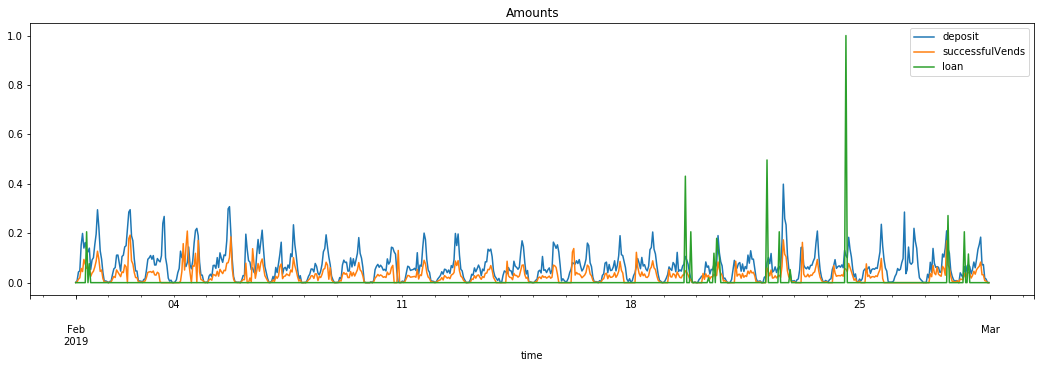

In [79]:
df[df.index.month==2].plot(title="Amounts")

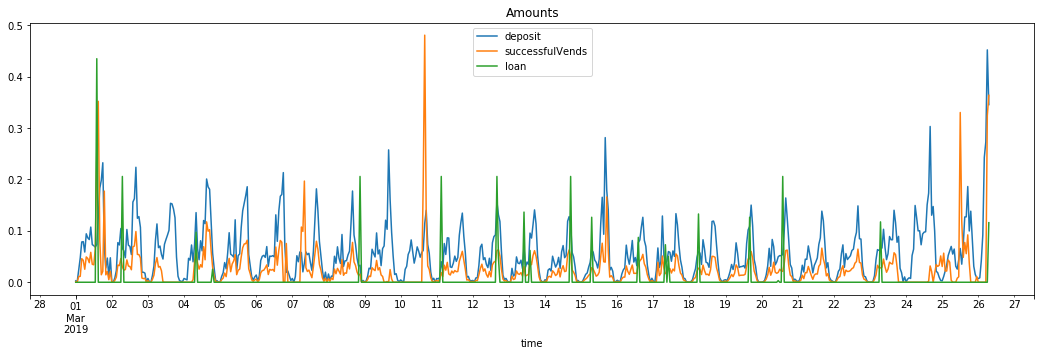

In [80]:
df[df.index.month==3].plot(title="Amounts")

### Comparing based on 3 hours

In [81]:
deposit_3H['amount']=normalize(deposit_3H['amount'])
successfulVends_3H['amount']=normalize(successfulVends_3H['amount'])
loan_3H['amount']=normalize(loan_3H['amount'])

In [82]:
df_3H = pd.DataFrame([deposit_3H.amount,successfulVends_3H.amount,loan_3H.amount]).T.dropna()
df_3H.columns=("deposit","successfulVends","loan")


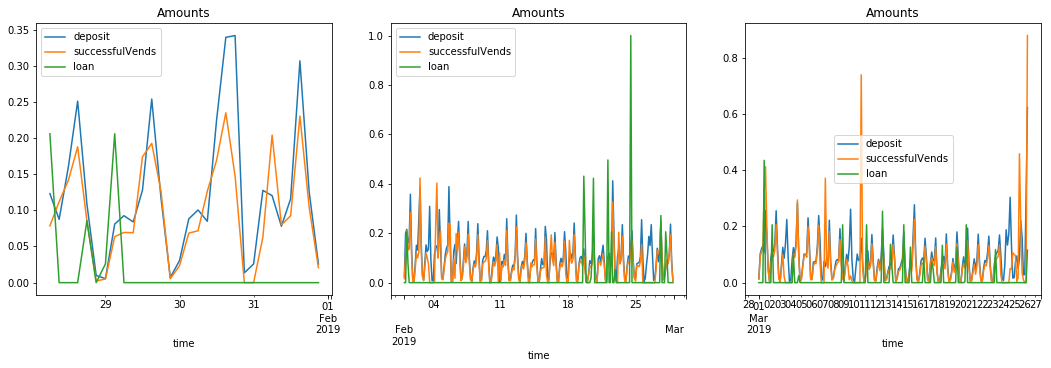

In [83]:
plt.rcParams['figure.figsize']=[18,5]
fig,axes = plt.subplots(nrows=1,ncols=3)
for i in range(1,4):
    
    df_3H[df_3H.index.month==i].plot(ax=axes[i-1],title="Amounts")

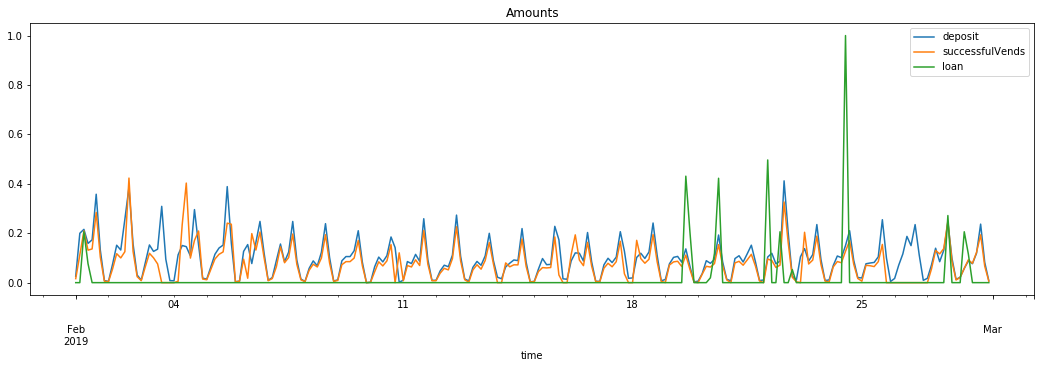

In [84]:
df_3H[df_3H.index.month==2].plot(title="Amounts")

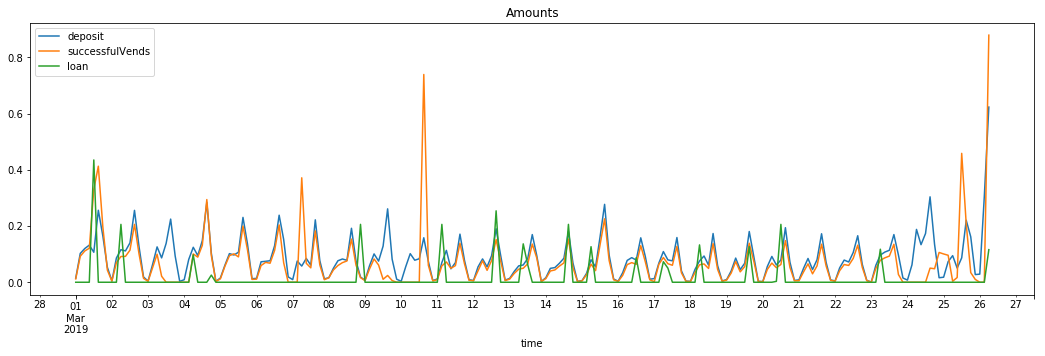

In [85]:
df_3H[df_3H.index.month==3].plot(title="Amounts")